---
# [ Project ] 구글 플레이 스토어 데이터를 활용한 데이터 분석

----
####  본 프로젝트는 1) 데이터 읽기 2) 데이터 전처리 3) 데이터 시각화 4) 데이터 분석의 총 4단계로 이루어져 있습니다.
#### ※ 분석의 목적은 다음과 같습니다. 
1) 설치수와 평점 사이에 관계가 있는지를 알아봅니다. <br>
2) 1번의 결과를 유료앱과 무료앱으로 나누어서 분석해봅니다. <br>
3) Category별 점유율을 구하고, 설치수와 평점의 평균을 구해봅니다.

--- 
## 1. 데이터 살펴보기

### ① 데이터 ###
   - 이 프로젝트에서 사용하는 데이터는 구글 플레이 스토어 데이터입니다.
   - https://www.kaggle.com/lava18/google-play-store-apps 에서 공개된 데이터를 사용합니다.
 
 
### ② 환경셋팅 ###
   - 이 프로젝트를 진행하기 위해서는 아래의 라이브러리가 설치되어 있어야합니다. Pandas, matplotlib
   - 개인의 컴퓨터에서 Jupyter Notebook 을 설치하기 힘든 상황이라면, Azure Notebook(https://notebooks.azure.com/) 을 사용하셔도 됩니다.
   
### ③ 필드 ###
- App, Category, Rating, Reviews  
- Size, Installs, Type, Price  
- Content Rating, Genres, Last Updated, Current Ver, Android Ver      


----

## 2. 데이터 읽기

### 해당 챕터의 목표
- csv로 저장되어 있는 데이터를 불러 올 수 있습니다.
- 불러온 데이터의 필드와 데이터수를 확인하는 것으로 추후 분석의 기초를 마련합니다.

제공되는 코드

In [1]:
import pandas as pd

### _데이터 읽기 문제_
문제에서 사용할 함수(다른 함수를 사용하는것으로 같은 결과를 출력할 수 있지만 가능한 아래의 함수를 사용해주세요)  
- read_csv, columns, shape

### [ Quiz 1] pandas의 함수를 사용하여 googleplaystore.csv을 읽어와 data라는 이름의 변수로 저장합니다.

In [2]:
data = pd.read_csv('./googleplaystore.csv')

In [3]:
# data = pd.read_csv('./datasets/googleplaystore.csv')

### [Quiz 2]data 의 필드명, 필드개수, 데이터 수를 출력합니다. print 함수로 화면에 명시적으로 출력합니다.

In [4]:
print(data.columns)
print(data.shape)
print(data.count())
print(data.info())

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')
(10841, 13)
App               10841
Category          10841
Rating             9367
Reviews           10841
Size              10841
Installs          10841
Type              10840
Price             10841
Content Rating    10840
Genres            10841
Last Updated      10841
Current Ver       10833
Android Ver       10838
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 

----
## 3. 데이터 전처리

### **해당 챕터의 목표**
- 가지고 온 데이터의 일부 값이 완전하지 않은 경우가 있습니다. 완전하지 않은 데이터를 사용하면 분석 결과에 오차가 생기거나 분석을 하지 못하는 경우가 발생합니다. 완전하지 않은 값을 수정하거나 해당 데이터를 삭제하는 것으로 추후 분석이 가능한 데이터를 구축합니다.

### _데이터전처리 문제_
#### 문제에서 사용할 함수(다른 함수를 사용하는것으로 같은 결과를 출력할 수 있지만 가능한 아래의 함수를 사용해주세요)  
- apply, lambda, replace
- 참고 링크 : https://datatofish.com/if-condition-in-pandas-dataframe/

### [Quiz 3] Installs 필드에 'Free'값으로 되어 있는 데이터를 필터(제거)합니다.

In [5]:
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [7]:
install_free = data[data['Installs'] == 'Free']

In [8]:
install_free.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [9]:
data = data[data['Installs'] != 'Free']

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10840 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          9366 non-null   float64
 3   Reviews         10840 non-null  object 
 4   Size            10840 non-null  object 
 5   Installs        10840 non-null  object 
 6   Type            10839 non-null  object 
 7   Price           10840 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10840 non-null  object 
 11  Current Ver     10832 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.2+ MB


### [Quiz 4]  Quiz3의 결과를 사용 : Installs 필드의 데이터에서 +와 ,를 제거한 후 숫자 타입으로 치환합니다.
<br> (참고: 1.의 필터 이후(->Quiz3의 처리 이후)의 데이터는 '1,000,000+'와 같이 되어있습니다.)

In [11]:
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [11]:
# data['Installs'] = data['Installs'].str.replace(pat=r'[^0-9]', repl= r'', regex=True)
data['Installs'] = data['Installs'].apply(lambda str: str.replace(',', '').replace('+', ''))

In [12]:
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000,Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,5000000,Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,50000000,Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,100000,Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [13]:
import numpy as np

In [14]:
data['Installs'] = data['Installs'].astype(np.int32)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10840 entries, 0 to 10840
Data columns (total 13 columns):
App               10840 non-null object
Category          10840 non-null object
Rating            9366 non-null float64
Reviews           10840 non-null object
Size              10840 non-null object
Installs          10840 non-null int32
Type              10839 non-null object
Price             10840 non-null object
Content Rating    10840 non-null object
Genres            10840 non-null object
Last Updated      10840 non-null object
Current Ver       10832 non-null object
Android Ver       10838 non-null object
dtypes: float64(1), int32(1), object(11)
memory usage: 1.1+ MB


In [15]:
data['Installs'].max()

1000000000

---
>- 리뷰
   - 잘해주셨습니다.
   - 코드상으로 조금 조언을 드리자면
   - 언어에서 이미 예약어로 쓰고 있는 것을 variable 이름으로 쓰는 것은 좋지 않습니다.
     - lambda 에 str을 써 주신 부분
     - x, y 등과 같이 간결한 걸로 써주시는 것이 좋습니다.
     - lambda 같이 간결한 경우!
   - 숫자타입 변환의 경우 np.int를 꼭 쓰시지 않고
   - 'int'만 해주셔도 돼요!

### [Quiz 5] Quiz4의 결과를 사용 : Size 필드에 'Varies with device'값으로 되어 있는 데이터를 필터(제거) 합니다.


In [16]:
temp_size = data[data['Size'] == 'Varies with device']

In [17]:
temp_size.count()

App               1695
Category          1695
Rating            1637
Reviews           1695
Size              1695
Installs          1695
Type              1694
Price             1695
Content Rating    1695
Genres            1695
Last Updated      1695
Current Ver       1695
Android Ver       1695
dtype: int64

In [18]:
data = data[data['Size'] != 'Varies with device']

In [19]:
temp_size = data[data['Size'] == 'Varies with device']

In [20]:
temp_size.count()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

### [Quiz 6] Quiz5의 결과를 사용 : Reviews 데이터를 숫자 타입으로 치환합니다.

In [21]:
data['Reviews'] = data['Reviews'].astype(np.int32)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9145 entries, 0 to 10840
Data columns (total 13 columns):
App               9145 non-null object
Category          9145 non-null object
Rating            7729 non-null float64
Reviews           9145 non-null int32
Size              9145 non-null object
Installs          9145 non-null int32
Type              9145 non-null object
Price             9145 non-null object
Content Rating    9145 non-null object
Genres            9145 non-null object
Last Updated      9145 non-null object
Current Ver       9137 non-null object
Android Ver       9143 non-null object
dtypes: float64(1), int32(2), object(10)
memory usage: 928.8+ KB


---
## 4. 데이터 시각화

### **해당 챕터의 목표**
- 전처리가 완료된 데이터를 사용하여 데이터를 시각화합니다.
- Rating과 Installs를 각각 x축과 y축에 매핑하는 것으로 평점과 설치수 사이의 상관관계를 눈으로 확인합니다.
- 유료앱과 무료앱을 나누어 시각화 하는 것으로 유료앱과 무료앱이 가지는 차이를 눈으로 확인합니다.

제공되는 코드

In [22]:
# data의 경우 데이터 전처리가 완료된 값을 사용해주세요.
import matplotlib.pyplot as plt
import numpy as np
visual_data = data

### _데이터 시각화 문제_
문제에서 사용할 함수(다른 함수를 사용하는것으로 같은 결과를 출력할 수 있지만 가능한 아래의 함수를 사용해주세요)  
- notnull, log10, scatter(또는 plot), groupby, subplots, get_group

### [Quiz 7]  Installs가 0 초과인  데이터만을 사용합니다. Rating, Intalls에서 값이 Nan인 데이터를 제거합니다.

In [23]:
visual_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9145 entries, 0 to 10840
Data columns (total 13 columns):
App               9145 non-null object
Category          9145 non-null object
Rating            7729 non-null float64
Reviews           9145 non-null int32
Size              9145 non-null object
Installs          9145 non-null int32
Type              9145 non-null object
Price             9145 non-null object
Content Rating    9145 non-null object
Genres            9145 non-null object
Last Updated      9145 non-null object
Current Ver       9137 non-null object
Android Ver       9143 non-null object
dtypes: float64(1), int32(2), object(10)
memory usage: 928.8+ KB


In [24]:
visual_data = visual_data[visual_data['Installs'] > 0]
visual_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9131 entries, 0 to 10840
Data columns (total 13 columns):
App               9131 non-null object
Category          9131 non-null object
Rating            7729 non-null float64
Reviews           9131 non-null int32
Size              9131 non-null object
Installs          9131 non-null int32
Type              9131 non-null object
Price             9131 non-null object
Content Rating    9131 non-null object
Genres            9131 non-null object
Last Updated      9131 non-null object
Current Ver       9123 non-null object
Android Ver       9129 non-null object
dtypes: float64(1), int32(2), object(10)
memory usage: 927.4+ KB


In [25]:
# visual_data = visual_data.dropna(subset=['Rating', 'Installs'])
visual_data = visual_data[pd.notnull(visual_data.Rating) & pd.notnull(visual_data.Installs)]

In [26]:
visual_data.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       4
Android Ver       2
dtype: int64

### [Quiz 8] X축이 Rating, Y축이 Installs인 점 그래프를 그려봅니다. <br>이 때 Installs의 값이 Rating에 비해 지나치게 크기 때문에 log10을 씌웁니다.

In [27]:
visual_data['Installs'] = np.log10(visual_data['Installs'])

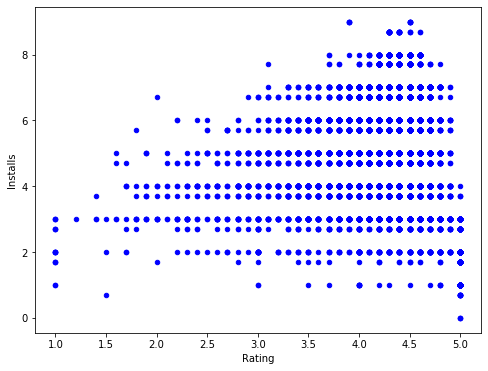

In [28]:
visual_data.plot.scatter(x='Rating', y='Installs', c='b', figsize=(8, 6))
plt.show()

### [Quiz 9] X축이 Rating, Y축이 Reviews인 점 그래프를 그려봅니다. <br> 이 때, Reviews의 값에 log10을 씌우고, Type으로 GroupBy 하여 Type의 값이 'Free'인 경우는 'red', 'Paid'인 경우는 'green' 으로 표시합니다.

In [29]:
type_group = visual_data.groupby('Type')
type_group.groups

{'Free': Int64Index([    0,     1,     2,     3,     4,     5,     6,     7,     8,
                 9,
             ...
             10827, 10828, 10829, 10830, 10832, 10833, 10834, 10836, 10837,
             10840],
            dtype='int64', length=7150),
 'Paid': Int64Index([  234,   235,   290,   291,   477,   481,   851,   852,   853,
               854,
             ...
             10583, 10586, 10594, 10675, 10682, 10690, 10697, 10760, 10782,
             10785],
            dtype='int64', length=579)}

In [30]:
type_group.count()

,App,Category,Rating,Reviews,Size,Installs,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
Type,,,,,,,,,,,,
Free,7150,7150,7150,7150,7150,7150,7150,7150,7150,7150,7147,7149
Paid,579,579,579,579,579,579,579,579,579,579,578,578


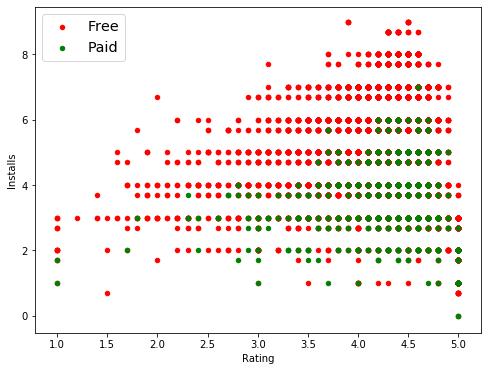

In [31]:
fig, ax = plt.subplots()
for name, group in type_group:
    if name == 'Free':
        color = 'r'
    elif name == 'Paid':
        color = 'g'
    group.plot.scatter(x='Rating', y='Installs', c=color, figsize=(8, 6), label=name, ax=ax)
plt.legend(loc='upper left', fontsize='x-large')
plt.show()

---
## 5. 데이터 분석

### **해당 챕터의 목표**
- 시각화의 결과로 얻어진 insight를 기반으로 하여 데이터의 수치적인 부분의 토대를 마련합니다.
- 데이터의 평균, 중앙값, 최대값, 최소값 등 수치적인 데이터를 구해봅니다.

제공되는 코드

In [32]:
# data의 경우 데이터 전처리가 완료된 값을 사용해주세요.
analysis_data = data

### _데이터 분석 문제_
문제에서 사용할 함수(다른 함수를 사용하는것으로 같은 결과를 출력할 수 있지만 가능한 아래의 함수를 사용해주세요)  
- notnull, value_counts, pie, show, round, mean, groupby, get_group
- 모든 정답은 소수점 2자리까지 출력합니다. 단, 2번 문제의 경우 autopct='%1.2f%%' 파라미터 사용, 그 외는 round 함수 사용 

### [Quiz 10] Rating, Intalls가 Nan인 데이터는 제거합니다.

In [33]:
analysis_data.isnull().sum()

App                  0
Category             0
Rating            1416
Reviews              0
Size                 0
Installs             0
Type                 0
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          8
Android Ver          2
dtype: int64

In [34]:
analysis_data = analysis_data[pd.notnull(analysis_data.Rating) & pd.notnull(analysis_data.Installs)]
# analysis_data = analysis_data.dropna(subset=['Rating', 'Installs'])
analysis_data.isnull().any()

App               False
Category          False
Rating            False
Reviews           False
Size              False
Installs          False
Type              False
Price             False
Content Rating    False
Genres            False
Last Updated      False
Current Ver        True
Android Ver        True
dtype: bool

### [Quiz 11] Category별 구글 플레이 스토어 점유율을 파이 그래프로 그려봅니다. 

In [35]:
analysis_data['Category'].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION'],
      dtype=object)

In [36]:
share = analysis_data['Category'].value_counts().sort_values(ascending=False)
share

FAMILY                 1617
GAME                    974
TOOLS                   634
MEDICAL                 324
LIFESTYLE               280
PERSONALIZATION         280
FINANCE                 266
SPORTS                  247
BUSINESS                246
PHOTOGRAPHY             236
PRODUCTIVITY            235
HEALTH_AND_FITNESS      223
COMMUNICATION           211
SHOPPING                179
SOCIAL                  177
DATING                  173
NEWS_AND_MAGAZINES      169
TRAVEL_AND_LOCAL        160
BOOKS_AND_REFERENCE     144
VIDEO_PLAYERS           116
EDUCATION               110
MAPS_AND_NAVIGATION      95
ENTERTAINMENT            90
FOOD_AND_DRINK           84
AUTO_AND_VEHICLES        63
LIBRARIES_AND_DEMO       62
ART_AND_DESIGN           59
HOUSE_AND_HOME           56
WEATHER                  51
COMICS                   49
PARENTING                44
EVENTS                   38
BEAUTY                   37
Name: Category, dtype: int64

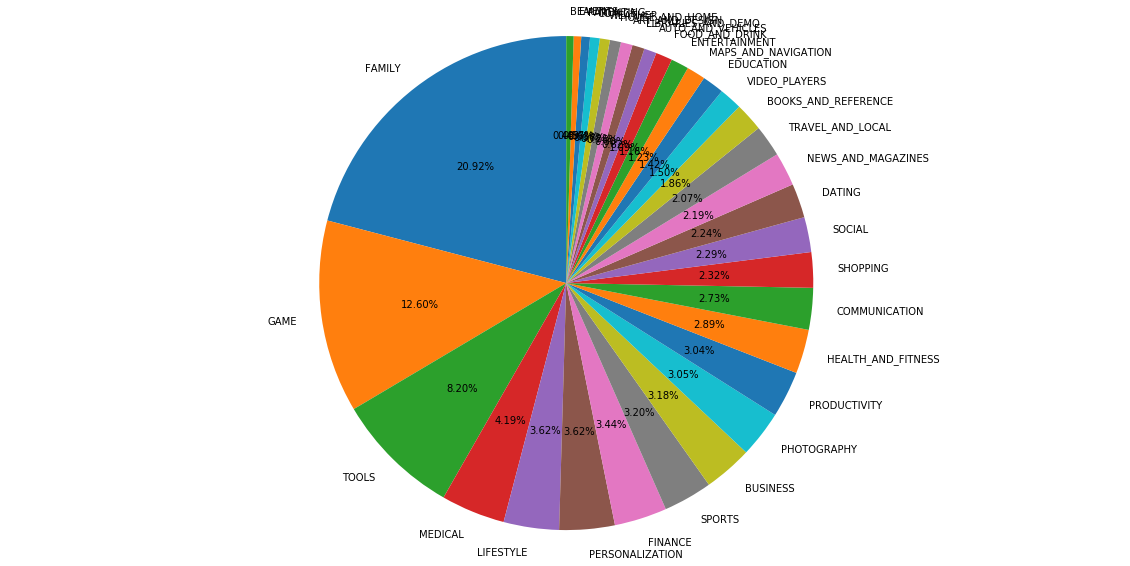

In [37]:
plt.figure(figsize=(20, 10))
plt.pie(share, labels=share.index, autopct='%1.2f%%', startangle=90)
plt.axis('equal')
plt.show()

### [Quiz 12] 점유율 상위 5개의 카테고리를 구하고, 각각의 Rating 평균, Installs 평균을 구해봅니다.



In [38]:
# LIFESTYLE 과 PERSONALIZATION 의 값이 280 으로 동일하게 나와 6개를 구햐였습니다.
# 현업에서는 이럴 경우 어떤 식으로 처리 하는 지 궁금합니다.
top5_share = analysis_data['Category'].value_counts().sort_values(ascending=False)[:6]
top5_share

FAMILY             1617
GAME                974
TOOLS               634
MEDICAL             324
LIFESTYLE           280
PERSONALIZATION     280
Name: Category, dtype: int64

In [39]:
top5_mean_rating_installs_category = round(analysis_data.groupby('Category').mean()[['Rating', 'Installs']].loc[top5_share.index], 2)
top5_mean_rating_installs_category

,Rating,Installs
FAMILY,4.19,4204349.77
GAME,4.27,30671922.71
TOOLS,4.01,5561598.58
MEDICAL,4.18,143497.15
LIFESTYLE,4.09,1563354.00
PERSONALIZATION,4.32,3564796.18


---
>- 리뷰
   - 잘해주셨습니다!
   - 이런 답을 원했지만 이 부분까지 해주시는 분은 정말 드물었습니다.
   - 사실 top5를 구하라고 했지만
   - 점수가 동일한 것이 존재할 경우, 위와 같이 모두 표시해줍니다.
     - top5의 점수만 구해오라는 것이 아니였으면 말이죠
   - 데이터를 살펴보지 않게 되면 상위 5개만 보여주고
   - 동일한 점수를 가지게 되는 row가 누락되는 실수가 발생할 수 있습니다.

### [Quiz 13] 점유율 상위 5개의 카테고리중 Rating 평균이 가장 높은 Category를 구하고 해당 Category 데이터를 Type별로 GroupBy한 후 Rating, Installs 평균을 구해봅니다.


In [40]:
top5_rating_category = top5_mean_rating_installs_category['Rating'].sort_values(ascending=False)
top5_rating_category

PERSONALIZATION    4.32
GAME               4.27
FAMILY             4.19
MEDICAL            4.18
LIFESTYLE          4.09
TOOLS              4.01
Name: Rating, dtype: float64

In [41]:
top5_rating_category.index[0]

'PERSONALIZATION'

In [42]:
round(analysis_data[analysis_data['Category'] == top5_rating_category.index[0]].groupby('Type').mean()[['Rating', 'Installs']], 2)

,Rating,Installs
Type,,
Free,4.29,4597659.31
Paid,4.43,78883.12
